<a href="https://colab.research.google.com/github/ghgit1798/2021-financial-competition/blob/Guhyeon/%EC%83%9D%ED%99%9C%EC%84%9C%EB%B9%84%EC%8A%A4%5B%EC%9D%BC%EB%B0%98%EA%B5%90%ED%86%B5%5D_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [ ]:
sh = pd.read_csv('신한카드_업종대분류 전처리완료.csv', index_col=0, encoding='utf-8')

In [ ]:
sh.columns

Index(['기준년월', '광역시도명', '업종대분류', '업종중분류', '업종소분류', '신규가맹점수', '해지가맹점수',
       '매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액'],
      dtype='object')

In [ ]:
sh['업종대분류'].unique()

array(['문화레져', '생활서비스', '음식', '일반유통', '전문서비스', '종합유통', '기타'], dtype=object)

### 카테고리 재분류 필요성
- 따라서 **데이터의 카테고리 재분류가 필요**할 수 있다.
- 개인교통: 교통관련 카테고리인 연료, 자동차정비, 자동차-기타, 수리점
- 일반교통: 대중교통, 택시, 터널/유료도로/하이패스
- 특수교통: 항공, 철도, 화물운송업, 여객선
- 월납/세금: 월납/세금
- 그 외 서비스: 사회단체, 세탁소, 사진, 농기구, 기계/장비 대여, 열쇠/도장 등

In [ ]:
sh = sh[sh['업종대분류'].str.contains('생활서비스')]

In [ ]:
sh['업종중분류'].unique()

array(['기계/장비 대여', '농기구', '대중교통', '미용/사우나/마사지', '사진', '사회단체', '세탁소',
       '수리점', '여객선', '연료', '열쇠/도장', '월납/세금', '자동차-기타', '자동차정비', '철도',
       '택시', '항공', '화물운송업', '터널/유료도로/하이패스'], dtype=object)

In [ ]:
personal_transport = sh[sh['업종중분류'].str.contains('연료|자동차-기타|자동차정비|수리점')]
public_transport = sh[sh['업종중분류'].str.contains('대중교통|택시|터널/유료도로|하이패스')]
special_transport = sh[sh['업종중분류'].str.contains('항공|철도|화물운송업|여객선')]
etc = sh[sh['업종중분류'].str.contains('사회단체|세탁소|사진|농기구|기계/장비 대여|열쇠/도장')]
tax = sh[sh['업종중분류'].str.contains('월납/세금')]

In [ ]:
sh = public_transport

In [ ]:
sh['업종소분류'].unique()

array(['고속버스', '버스/지하철', '택시', '유료도로'], dtype=object)

In [ ]:
sh

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
69,201903,강원,생활서비스,대중교통,고속버스,0,0,5,10164000,520,2032840,19547
70,201903,강원,생활서비스,대중교통,버스/지하철,0,0,5,1223695000,401358,244738966,3049
112,201903,강원,생활서비스,택시,택시,0,2,8,92679000,282,11584906,328650
407,201903,경기,생활서비스,대중교통,고속버스,6,2,89,443630000,137083,4984611,3236
408,201903,경기,생활서비스,대중교통,버스/지하철,0,0,14,5195421000,3175365,371101484,1636
...,...,...,...,...,...,...,...,...,...,...,...,...
23328,202009,충남,생활서비스,터널/유료도로/하이패스,유료도로,0,0,1,1146433000,607788,1146433400,1886
23625,202009,충북,생활서비스,대중교통,고속버스,0,0,0,0,0,0,0
23626,202009,충북,생활서비스,대중교통,버스/지하철,0,0,1,2770000,76,2770000,36447
23664,202009,충북,생활서비스,택시,택시,1,0,21,337985000,6833,16094545,49464


In [ ]:
group = sh.groupby(by='업종소분류').sum().reset_index()
group.drop(columns='기준년월', inplace=True)
group

,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,고속버스,25,25,696,23101152000,2228204,887872862,17637366
1,버스/지하철,1,3,495,578124820000,95375017,46373559488,3641678
2,유료도로,0,0,164,153872214000,60120863,54294643732,77455
3,택시,259,540,48189,236927510000,26863840,5637393646,12986849


In [ ]:
group = group[group['매출가맹점수']!=0]
group = group[group['카드매출건수']!=0]

In [ ]:
# 점당매출금액, 건당매출금액 재계산
group['점당매출금액'] = group['카드매출금액']//group['매출가맹점수']
group['건당매출금액'] = group['카드매출금액']//group['카드매출건수']

In [ ]:
vcols = ['매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액']

In [ ]:
# 표준화 수행
cls = group[vcols]
cols = cls.columns
scaler = StandardScaler()
scaler.fit(cls)
scaled = scaler.transform(cls)
scaled

array([[-0.56550622, -1.09565116, -1.25234966, -0.9607007 ,  1.15070722],
       [-0.57522963,  1.60820865,  1.40374388,  1.20710263, -0.30001604],
       [-0.59124183, -0.45858532,  0.39846707,  0.76831473, -1.47986575],
       [ 1.73197768, -0.05397217, -0.54986129, -1.01471666,  0.62917457]])

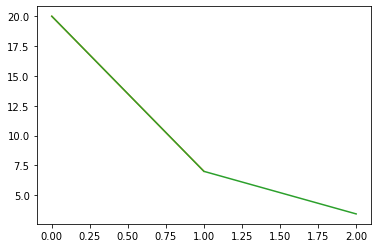

In [ ]:
# screeplot 그리기
def elbow(x):
  sse = []

  for i in range(1, 4):
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)
    plt.plot(sse)
  plt.show()

elbow(scaled)

In [ ]:
# cluster 수는 2개로 결정
km = KMeans(n_clusters=3)
km.fit(scaled)
km.cluster_centers_

array([[-0.58323573,  0.57481166,  0.90110547,  0.98770868, -0.88994089],
       [ 1.73197768, -0.05397217, -0.54986129, -1.01471666,  0.62917457],
       [-0.56550622, -1.09565116, -1.25234966, -0.9607007 ,  1.15070722]])

In [ ]:
cluster = pd.DataFrame(km.cluster_centers_, columns=cls.columns)
cluster

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,-0.583236,0.574812,0.901105,0.987709,-0.889941
1,1.731978,-0.053972,-0.549861,-1.014717,0.629175
2,-0.565506,-1.095651,-1.252350,-0.960701,1.150707


In [ ]:
predict = pd.DataFrame(km.predict(scaled))
predict.columns = ['클러스터']
predict

,클러스터
0,2
1,0
2,0
3,1


In [ ]:
scaled = pd.DataFrame(data=scaled, columns=cls.columns)
scaled

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,-0.565506,-1.095651,-1.252350,-0.960701,1.150707
1,-0.575230,1.608209,1.403744,1.207103,-0.300016
2,-0.591242,-0.458585,0.398467,0.768315,-1.479866
3,1.731978,-0.053972,-0.549861,-1.014717,0.629175


In [ ]:
names = pd.DataFrame(group['업종소분류'])
names.reset_index(inplace=True, drop=True)
names

,업종소분류
0,고속버스
1,버스/지하철
2,유료도로
3,택시


In [ ]:
# names와 결합
result = pd.concat([scaled, names], axis=1)
result = pd.concat([result, predict], axis=1)
result

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액,업종소분류,클러스터
0,-0.565506,-1.095651,-1.252350,-0.960701,1.150707,고속버스,2
1,-0.575230,1.608209,1.403744,1.207103,-0.300016,버스/지하철,0
2,-0.591242,-0.458585,0.398467,0.768315,-1.479866,유료도로,0
3,1.731978,-0.053972,-0.549861,-1.014717,0.629175,택시,1


In [ ]:
# cluster labeling
# 0번 클러스터는 가맹점수, 매출건수가 크지만 건당,점당매출은 작은 편의점 같은 산업들이 해당된다.
# 1번 클러스터는 가맹점수, 매출건수는 작지만 건당,점당매출이 큰 유통, 전문서비스 등 음식을 제외한 산업이 해당된다.
cluster

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,-0.583236,0.574812,0.901105,0.987709,-0.889941
1,1.731978,-0.053972,-0.549861,-1.014717,0.629175
2,-0.565506,-1.095651,-1.252350,-0.960701,1.150707


In [ ]:
def show_cluster(result, name):
  categories = cols
  color = ['skyblue', 'blue', 'salmon', 'green', 'orange']

  target = result[result['업종소분류']==name]

  fig = go.Figure()

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[0],
      theta = categories,
      fill='toself',
      name='Cluster0',
      line_color=color[0]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[1],
      theta = categories,
      fill='toself',
      name='Cluster1',
      line_color=color[1]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[2],
      theta = categories,
      fill='toself',
      name='Cluster2',
      line_color=color[2]
  ))

  fig.add_trace(go.Scatterpolar(
      r = target.values[0],
      theta = categories,
      fill='toself',
      name=name,
      line_color=color[3]
  ))

  # fig.add_trace(go.Scatterpolar(
  #     r = cluster.values[3],
  #     theta = categories,
  #     fill='toself',
  #     name='Cluster3',
  #     line_color=color[3]
  # ))

  # fig.add_trace(go.Scatterpolar(
  #     r = target.values[0],
  #     theta = categories,
  #     fill='toself',
  #     name=name,
  #     line_color=color[4]
  # ))

  fig.update_layout(
    polar=dict(
      radialaxis=dict(
        title=str(target['클러스터']),
        visible=True,
      )),
  )
  print(name, target['클러스터'])
  fig.show()

# 클라우드 맥주 클러스터링 결과
# show_cluster(result, '편의점')

In [ ]:
# StandardScaler, MinMaxScaler 사용 시 Outlier에 굉장히 민감함.
for col in sh['업종소분류'].unique():
  show_cluster(result, col)

고속버스 0    2
Name: 클러스터, dtype: int32


버스/지하철 1    0
Name: 클러스터, dtype: int32


택시 3    1
Name: 클러스터, dtype: int32


유료도로 2    0
Name: 클러스터, dtype: int32


### 카테고리 재분류 필요성
- 따라서 **데이터의 카테고리 재분류가 필요**할 수 있다.
- 개인교통: 교통관련 카테고리인 연료, 자동차정비, 자동차-기타, 수리점
- 일반교통: 대중교통, 택시, 터널/유료도로/하이패스
- 특수교통: 항공, 철도, 화물운송업, 여객선
- 월납/세금: 월납/세금
- 그 외 서비스: 사회단체, 세탁소, 사진, 농기구, 기계/장비 대여, 열쇠/도장 등